# Pratyush Singh - Fitting Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

# Power on the Moon

<img src="images/ApolloRTG.jpg" alt="Apollo_ALSEP_RTG" style="width: 500px;"/>

----

* The Apollo lunar mission deployed a series of experiments on the Moon.
* The experiment package was called the Apollo Lunar Surface Experiments Package [(ALSEP)](https://en.wikipedia.org/wiki/Apollo_Lunar_Surface_Experiments_Package)
* The ALSEP was powered by a radioisotope thermoelectric generator [(RTG)](https://en.wikipedia.org/wiki/Radioisotope_thermoelectric_generator)

----

* An RTG is basically a fist-sized slug of Pu-238 wrapped in a material that generates electric power when heated.
* Since the RTG is powered by a radioisotope, the output power decreases over time as the radioisotope decays.

## Read in the datafile

The data file `/Data/Apollo_RTG.csv` contains the power output of the Apollo 12 RTG as a function of time.

The data colunms are

* [Day] - Days on the Moon
* [Power] - RTG power output in Watts

In [8]:
table = pd.read_csv('./Data/Apollo_RTG.csv')
plt.style.use('ggplot')
table.head()

,Day,Power
0,34.4342,73.786264
1,151.3030,73.454312
2,297.2840,72.385425
3,443.4230,72.297457
4,584.6110,71.719237


## Plot the Data

* Day vs. Power
* Use the OO interface to matplotlib
* Fit the function with a polynomial (degree >= 3)
* Plot the fit with the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

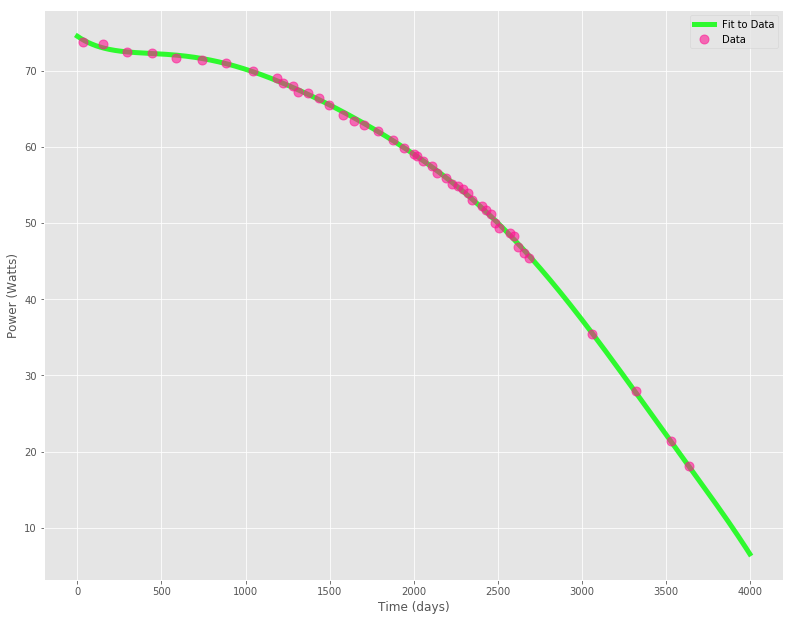

In [81]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("Time (days)")
ax.set_ylabel("Power (Watts)")

#fit
my_fit = np.polyfit(table['Day'],table['Power'],7)
fitted_poly = np.poly1d(my_fit)

#plot
xx = np.linspace(0,4000,2000)

ax.plot(xx, fitted_poly(xx), linewidth=5, color='Lime', alpha=.8, linestyle='-',
       label="Fit to Data");

ax.plot(table['Day'],table['Power'], color = "DeepPink",alpha=.6, marker ="o", linestyle="None",
        markersize = 9, label="Data");
ax.legend(loc=0);

## Power over time

* All of your answer should be formatted as sentences
* For example: `The power on day 0 is VALUE Watts`

### 1 - What was the power output on Day 0?

In [82]:
my_string = "The power on day 0 is {0:.2f} Watts.".format(fitted_poly(0))
print(my_string)

The power on day 0 is 74.51 Watts.


### 2 - How many years after landing could you still power a 60 W lightbulb?

In [83]:
my_complex= (fitted_poly - 60).roots
yr = (my_complex[2].real) / 365
my_string = "After {0:.2f} years, you could still power a 60 W lightbulb.".format(yr)
print(my_string)

After 5.07 years, you could still power a 60 W lightbulb.


### 3 - How many years after landing could you still power a 5 W USB device?

In [84]:
my_complex= (fitted_poly - 5).roots
yr = (my_complex[2].real) /365
my_string = "After {0:.2f} years, you could still power a 5 W USB.".format(yr)
print(my_string)

After 11.08 years, you could still power a 5 W USB.


### 4 - How many years after landing until the power output is 0 W?

In [85]:
my_complex= (fitted_poly).roots
yr = (my_complex[2].real)/ 365
my_string = "After {0:.2f} years, the power output is 0 W.".format(yr)
print(my_string)

After 11.43 years, the power output is 0 W.


---

# Fitting data to a function

* The datafile `./Data/linedata.csv` contains two columns of data
* Use the OO interface to matplotlib
* Plot the data (with labels!)
* Fit the function below to the data
* Find the values `(A,C,W)` that best fit the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

----

#### Fit a gaussian of the form:

$$ \Large f(x) = A e^{-\frac{(x - C)^2}{W}} $$

* A = amplitude of the gaussian
* C = x-value of the central peak of the gaussian
* W = width of the gaussian


In [87]:
data = pd.read_csv('./Data/linedata.csv')
data.head()

,wavelength,flux
0,0.0,-0.305196
1,0.1,0.004932
2,0.2,0.192535
3,0.3,0.100639
4,0.4,0.244992


In [98]:
def fun(x, A, C, W):
    return A*(np.exp(-((x-C)**2)/W))

In [99]:
my_A = 5
my_C = 5.8
my_W = 3

init_guesses = [my_A, my_C, my_W]

In [101]:
fitpars, error = curve_fit(fun,data['wavelength'],data['flux'], p0 = init_guesses)
print(fitpars)

[5.07800749 5.65866133 0.97344284]


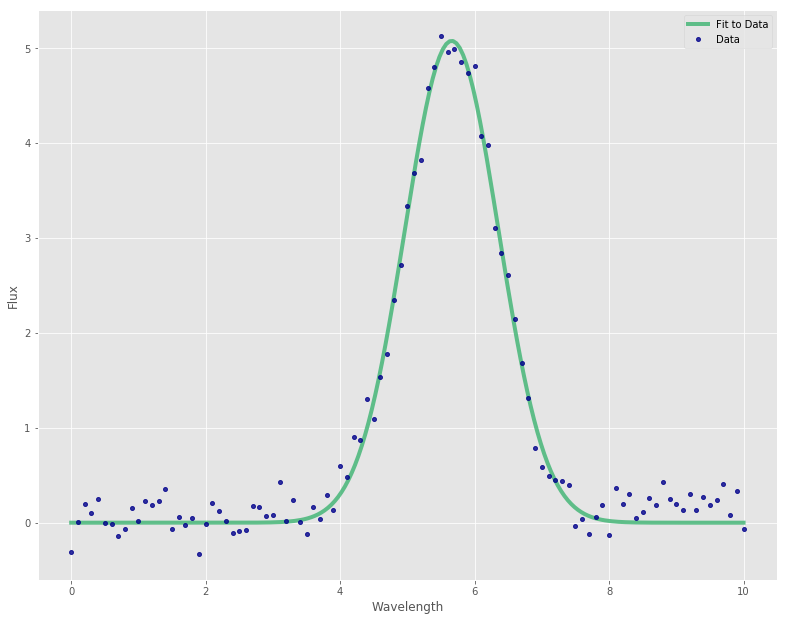

In [110]:
z = np.linspace(0,10,200)
fig, ax= plt.subplots(1,1)
fig.set_size_inches(11, 8.5)
fig.tight_layout()

ax.set_xlabel("Wavelength");
ax.set_ylabel("Flux");

ax.plot(z, fun(z, *fitpars), color = "MediumSeaGreen",alpha=.8, linestyle="-",
       linewidth=4, label="Fit to Data");

ax.plot(data['wavelength'],data['flux'], color = "DarkBlue", alpha = .8, marker ="o",linestyle="None",
        markersize="4", label ="Data");
ax.legend(loc=0);

### Due Mon Feb 25 - 1 pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`

----

# <font color=blue>Ravenclaw</font>

#### The file `./Data/StarData.csv` is a spectra of a main sequence star

* Col 1 - Wavelength `[angstroms]`
* Col 2 - Flux `[normalized to 0->1]`

#### Read in the Data

In [111]:
stars = pd.read_csv('./Data/StarData.csv')
stars.head()

,wavelength,flux
0,1150.0,0.004348
1,1155.0,0.004890
2,1160.0,0.004011
3,1165.0,0.000307
4,1170.0,0.000000


#### Plot the Data

* Use the OO interface to matplotlib
* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

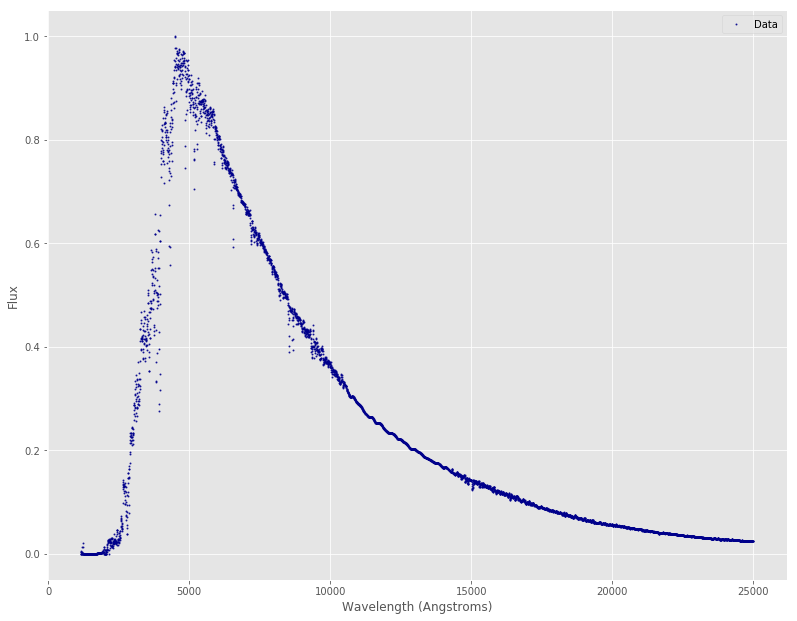

In [114]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(11, 8.5)
fig.tight_layout()

ax.set_xlabel("Wavelength (Angstroms)");
ax.set_ylabel("Flux");

ax.plot(stars['wavelength'],stars['flux'], color = "DarkBlue", alpha = .8, marker ="o",linestyle="None",
        markersize="1", label ="Data");
ax.legend(loc=0);

#### Use [Wien's law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law) to determine the temperature of the Star

In [116]:
from astropy import units as u
from astropy import constants as const

In [242]:
wave = stars['wavelength']

waves = np.array([wave]) * u.angstrom
waves_max = np.amax(waves)


T = 6373 *u.K

In [243]:
T

<Quantity 6373. K>

#### Plank's Law

* [Plank's Law](https://en.wikipedia.org/wiki/Planck%27s_law) describes the spectra emitted by a blackbody at a temperature T
* Calculated the blackbody flux at the above temperature at all of your data_wavelength points
* Scale the blackbody flux to `[0->1]`

In [244]:
den = np.exp((const.h * const.c)/(waves*const.k_B*T)) - 1
term = (2*const.h*(const.c)**2)/(waves**5)
F = term * (1/den)

def normalize_data(data_array):
    result = (data_array - data_array.min()) / (data_array.max() - data_array.min())
    return result
f_normal = normalize_data(F)
f_norm = np.empty(f_normal.size)

for i in range(0, f_normal.size):
    f_norm[i] = f_normal[0,i]


#### Plot the Data and the Blackbody fit on the same plot

* Use the OO interface to matplotlib
* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

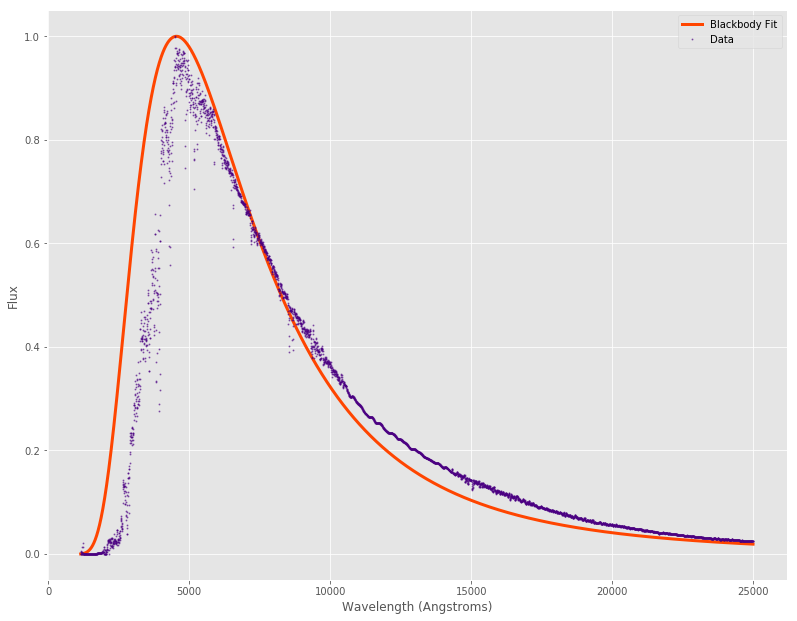

In [250]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(11, 8.5)
fig.tight_layout()

ax.set_xlabel("Wavelength (Angstroms)");
ax.set_ylabel("Flux");
ax.plot(stars['wavelength'], f_norm, color ="OrangeRed",
        linestyle = "-", linewidth = 3, label = "Blackbody Fit")
ax.plot(stars['wavelength'],stars['flux'], color = "Indigo", alpha = .5, marker ="o",linestyle="None",
        markersize="1", label ="Data");
ax.legend(loc=0);